In [176]:
%load_ext autoreload
%autoreload 2

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

import data_utils
import plots
import truncated_normal, normal
import deltas
import projection


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


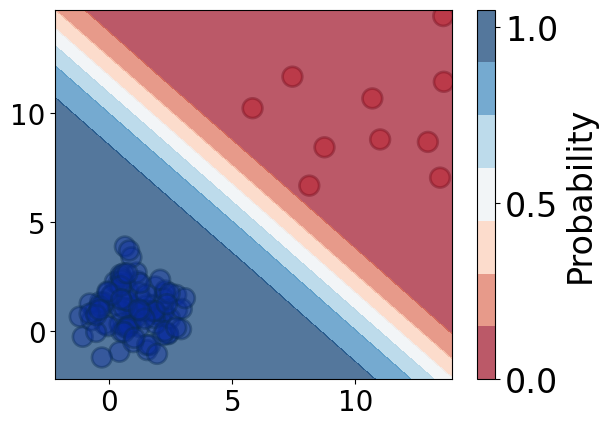

In [177]:
m1 = [1, 1]
m2 = [10, 10]
cov1 = [[1, 0], [0, 1]]
cov2 = [[5, 0], [0, 5]]

data = normal.get_two_classes(means=[m1, m2], 
                              covs=[cov1, cov2],
                              num_samples=[100, 10])
scaler = data_utils.normaliser(data)
# data = scaler(data)

clf = SVC(random_state=0, probability=True,
          kernel='linear').fit(data['X'], data['y'])

clf = LogisticRegression().fit(data['X'], data['y'])

ax, _ = plots._get_axes(None)
plots.plot_classes(data, ax=ax)
plots.plot_decision_boundary(clf, data, ax=ax)
plots.plt.show()

7.2268076344249526
19.8384837028501
19.829949808886802


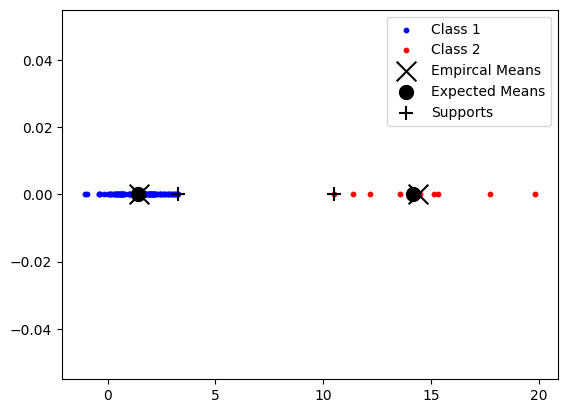

In [202]:
# get projections
proj_data = projection.from_clf(data, clf, supports=True)
proj_means = projection.from_clf({'X': np.array([m1, m2]), 'y': [0, 1]}, clf)

# Empircal M
emp_M = np.abs(proj_data['supports'][1]-proj_data['supports'][0]).squeeze()
print(emp_M)

# get Rs
def supremum(X):
    euclid = np.sqrt(np.sum(np.square(X), axis=1))
    return np.max(euclid)

R_sup = supremum(data['X'])
R_sup_proj = supremum(proj_data['X'])

# plot
ax = plots.plot_projection(proj_data, proj_means)